
# HHCART(D) Evaluation on Barbell Dataset
 
This notebook evaluates the HHCART(D) decision tree algorithm on the 2D Barbell dataset with 5% label noise. It demonstrates the full pipeline: dataset loading, model training, inspection, and performance visualisation. Structural regularisation parameters are used to decrease over fragmentation of the input space.

## Import dependencies

In [1]:
from HHCART_SD import HHCartD, load_model
from src.load_shapes import load_shape_dataset

## Load the dataset
 
Load the 2D Barbell dataset with label noise. The dataset is retrieved from the predefined `shapes` folder.

In [2]:
# Load and unpack a specific dataset
dataset_name = "barbell_2d_label_noise_005"
X, y = load_shape_dataset(folder_name="shapes")[dataset_name]


Loaded 32 paired datasets: ['barbell_2d_label_noise_000', 'barbell_3d_label_noise_000', 'radial_segment_2d_label_noise_000', 'radial_segment_3d_label_noise_000', 'rectangle_2d_label_noise_000', 'saddle_3d_label_noise_000', 'sine_wave_2d_label_noise_000', 'star_2d_label_noise_000', 'barbell_2d_label_noise_003', 'barbell_3d_label_noise_003', 'radial_segment_2d_label_noise_003', 'radial_segment_3d_label_noise_003', 'rectangle_2d_label_noise_003', 'saddle_3d_label_noise_003', 'sine_wave_2d_label_noise_003', 'star_2d_label_noise_003', 'barbell_2d_label_noise_005', 'barbell_3d_label_noise_005', 'radial_segment_2d_label_noise_005', 'radial_segment_3d_label_noise_005', 'rectangle_2d_label_noise_005', 'saddle_3d_label_noise_005', 'sine_wave_2d_label_noise_005', 'star_2d_label_noise_005', 'barbell_2d_label_noise_007', 'barbell_3d_label_noise_007', 'radial_segment_2d_label_noise_007', 'radial_segment_3d_label_noise_007', 'rectangle_2d_label_noise_007', 'saddle_3d_label_noise_007', 'sine_wave_2d_

## Configure and train HHCART(D)

Define the tree parameters and train the HHCART(D) model. The trained tree is saved.

In [3]:
# # Set tree parameters
# max_depth = 8
# min_purity = 0.9
# mass_min = 0.05
# 
# # Instantiate HHCART, build and save tree
# hh = HHCartD(X, y, min_purity=min_purity, mass_min=mass_min, max_depth=max_depth)
# hh.build_tree(f"{dataset_name}_max_depth_{max_depth}_pur_{str(min_purity).replace('.', '_')}_mass_{str(mass_min).replace('.', '_')}")

## Reload saved model

Load a previously saved tree for inspection and visualisation.

In [4]:
hh = load_model("barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05")

[LOADED] HHCartD model loaded from: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\model


## Inspect a selected depth

Select and inspect the tree structure at a specific depth level.

In [5]:
hh.select(depth=3)
hh.inspect()

[OK] Selected tree at depth 3.

[INSPECT] Inspecting tree at selected depth 3...

[Node id=0, depth=0, impurity=0.4093, oblique] (split: -0.75*x0 +0.66*x1 + -0.18 >= 0)
├── [Node id=1, depth=1, impurity=0.3317, oblique] (split: +0.75*x0 -0.66*x1 + -0.26 >= 0)
├── ├── [Node id=2, depth=2, impurity=0.3778, oblique] (split: -0.71*x0 -0.70*x1 + +1.23 >= 0)
├── ├── ├── [Node id=3, depth=3] (leaf: prediction=0, purity=0.80, samples=371)
├── ├── └── [Node id=4, depth=3] (leaf: prediction=1, purity=0.74, samples=4959)
├── └── [Node id=21, depth=2] (leaf: prediction=0, purity=0.92, samples=2394)
└── [Node id=22, depth=1] (leaf: prediction=0, purity=0.95, samples=2276)


## Plot tree structure

Visualise the decision tree structure up to a specified depth.

[SAVE] Graphviz tree saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05/tree_structure_d4.pdf


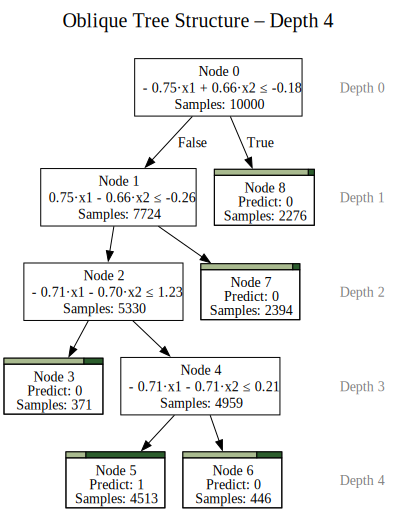

In [6]:
hh.plot_tree_structure(depth=4, stack_split_terms=False, save=True)

[SAVE] Graphviz tree saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05/tree_structure_d6.pdf


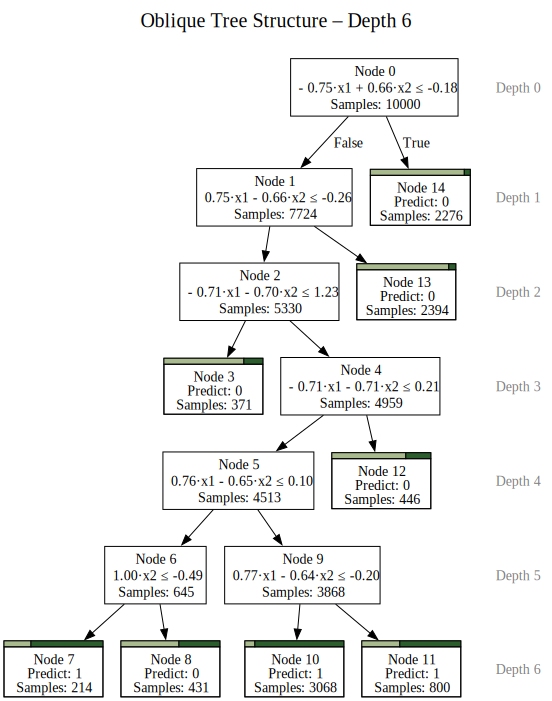

In [7]:
hh.plot_tree_structure(depth=6, stack_split_terms=False, save=True)

## Plot performance metrics versus tree depth

Show how coverage and density evolve with tree depth.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\metrics_vs_depth.pdf


(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'center': 'Performance Metrics vs. Tree Depth'}, xlabel='Tree Depth', ylabel='Score'>)

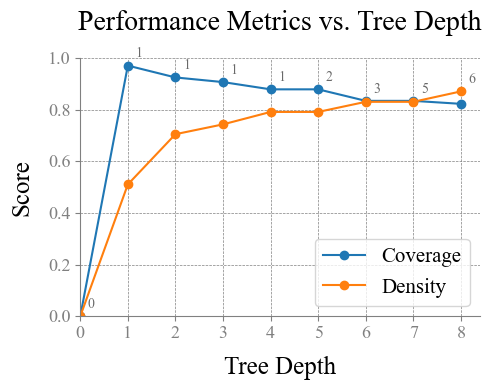

In [8]:
hh.plot_metrics_vs_structure(save=True)

## Plot performance metrics versus number of subspaces

Use the number of leaf nodes labelled as class 1 as the structural axis.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\metrics_vs_class1_leaf_count.pdf


(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'center': 'Performance Metrics vs. Class 1 Leaf Count'}, xlabel='Class 1 Leaf Count', ylabel='Score'>)

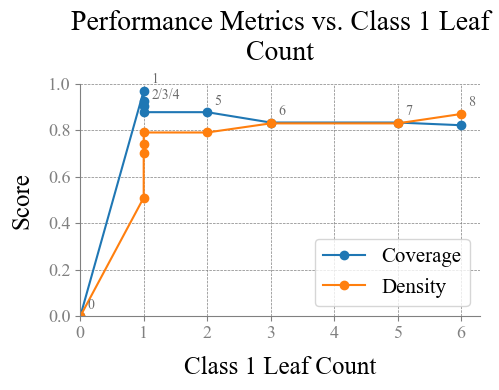

In [9]:
hh.plot_metrics_vs_structure(save=True, x_axis="class1_leaf_count")

## Plot trade-off path with tree depth colouring

Visualise the trade-off between coverage, density, and interpretability across tree depths.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\coverage_density_path_depth.pdf


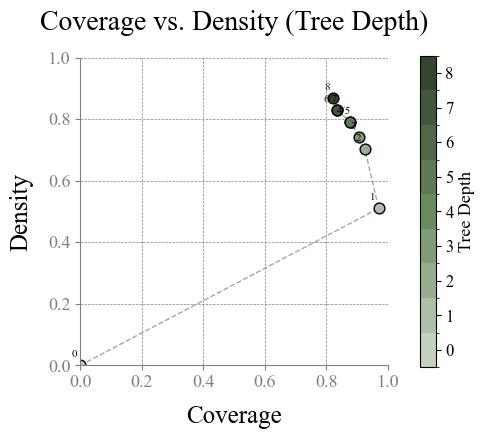

In [10]:
hh.plot_tradeoff_path(save=True)

## Plot trade-off path with subspace colouring

Colour the trade-off path by the number of class 1 subspaces.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\coverage_density_path_class1_leaf_count.pdf


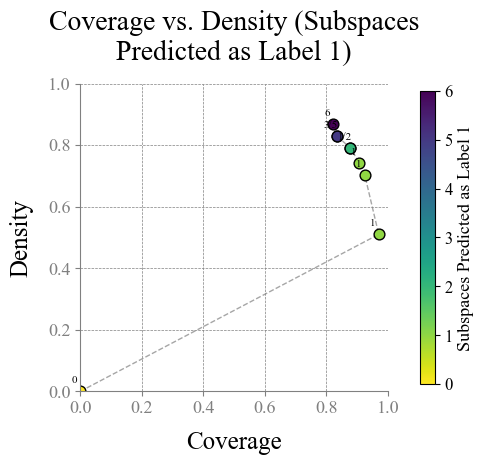

In [11]:
hh.plot_tradeoff_path(save=True, color_by="class1_leaf_count")

## Plot node size distribution
 
Plot the number of samples per node throughout the tree.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\node_size_distribution.pdf


(<Figure size 550x400 with 1 Axes>,
 <Axes: title={'center': 'Node Size Distribution by Depth'}, xlabel='Tree Depth', ylabel='Samples per Node'>)

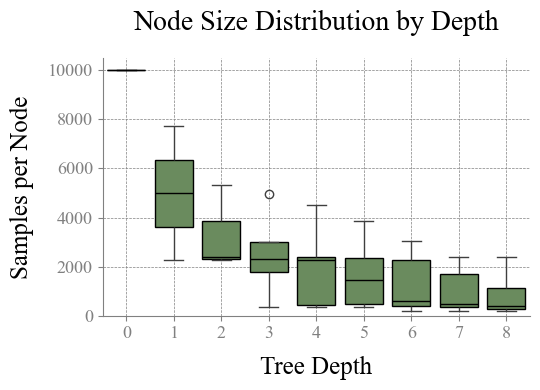

In [12]:
hh.plot_node_size_distribution(save=True)

## Plot split boundaries as 2D grid
 
Visualise split lines across all depths in a grid format.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\clipped_oblique_splits.pdf


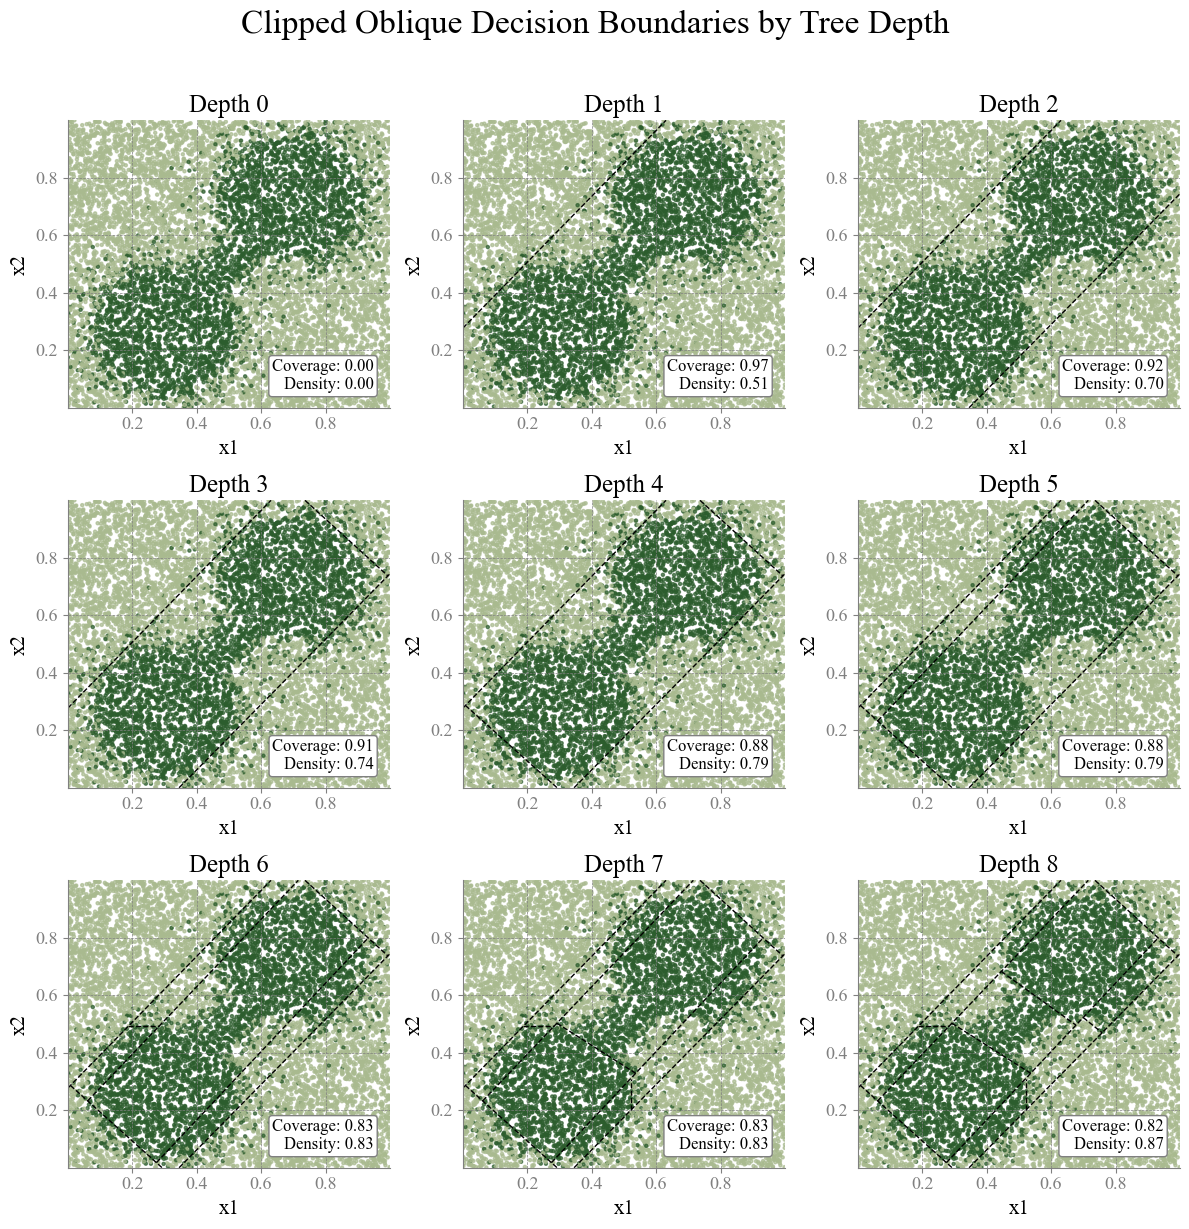

In [13]:
hh.plot_splits_2d_grid(save=True)

## Plot split boundaries as 2D overlay

Overlay split lines on the dataset for a specific depth.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\splits_2d_overlay_depth_4.pdf


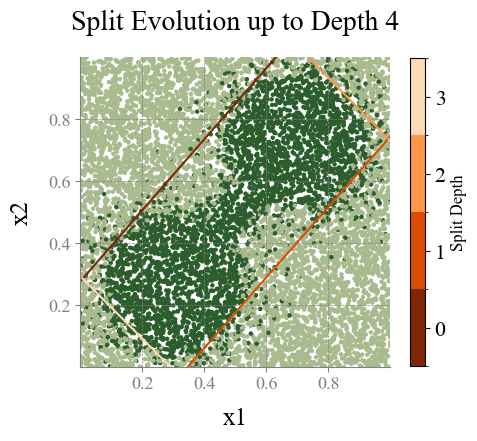

In [14]:
hh.plot_splits_2d_overlay(depth=4, save=True)

## Plot partitioned regions

Visualise the input space partitions produced by the tree at each depth.

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\E_comparison_on_benchmark_shapes\hhcart_d\data\barbell_2d_label_noise_005_max_depth_8_pur_0_9_mass_0_05\oblique_regions_by_depth.pdf


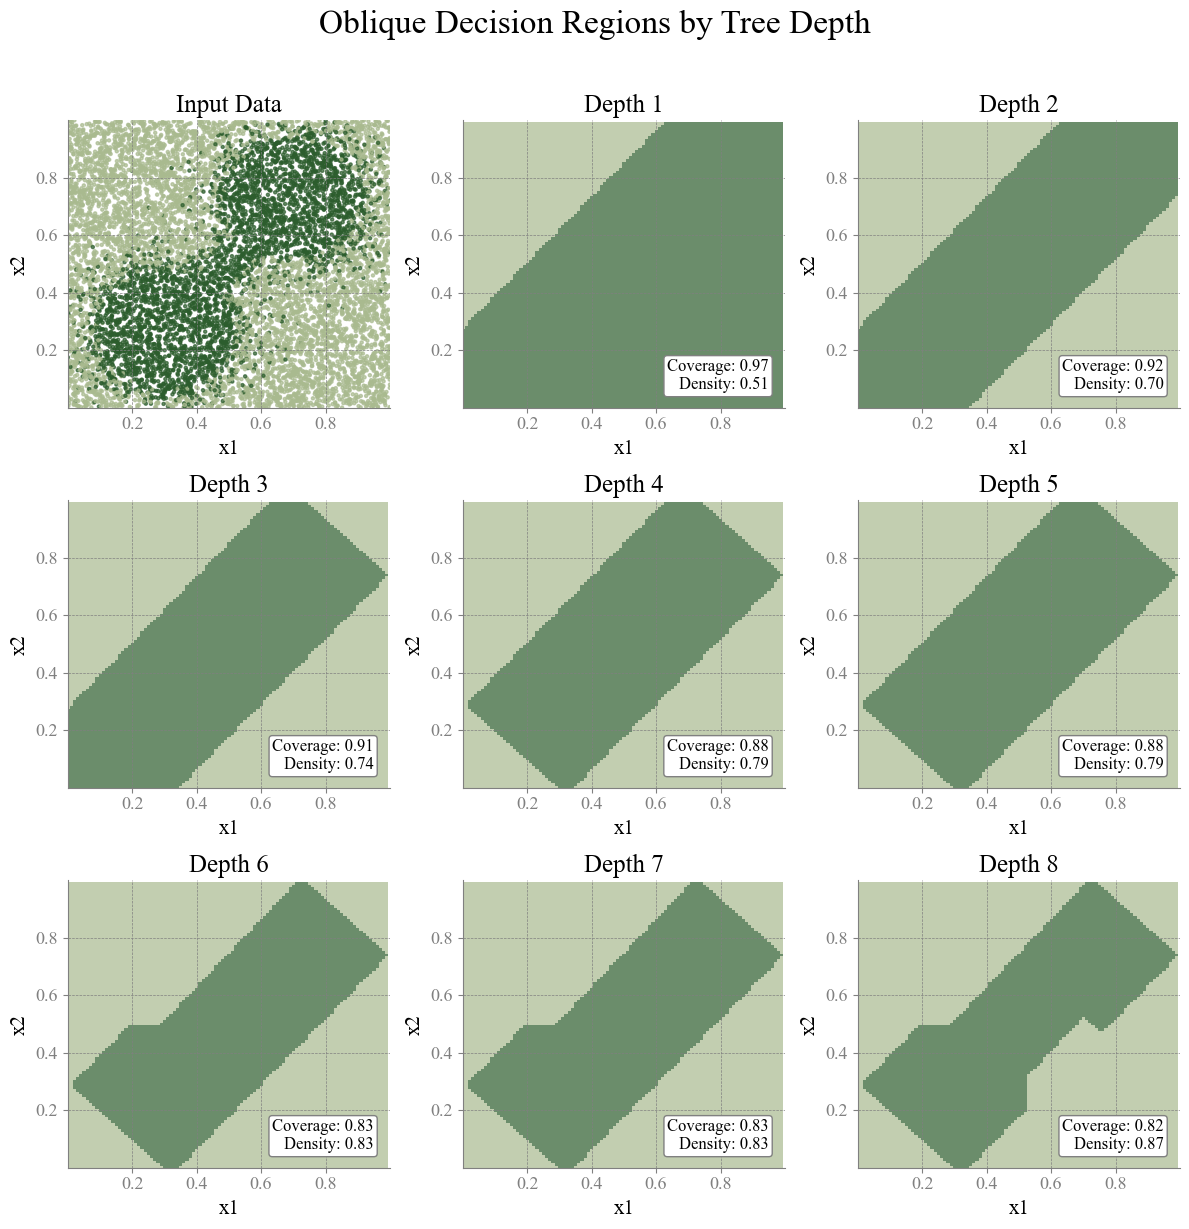

In [15]:
hh.plot_regions_2d_grid(save=True)